In [1]:
import cv2
import numpy as np

In [2]:
#for debugging not needed in end
from matplotlib import pyplot as plt

In [3]:
import cv2

def cv2_imshow(img, title):
    """
    function:
    - reads image from `path`,
    - shows image in a separate window,
    - waits for any key to close the window.

    return: image object
    """

    #img = cv2.imread(path)

    cv2.startWindowThread()
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return img

In [4]:
# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

In [5]:
# Load template, convert to grayscale, perform canny edge detection
template = cv2.imread('symbols/Blueshadow.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
#cv2.imshow("template", template)

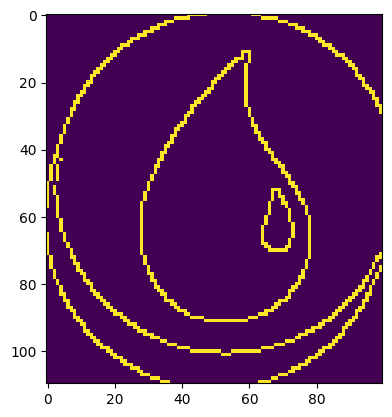

In [6]:
#Show the image with matplotlib
plt.imshow(template)
plt.show()
#cv2_imshow(template,"bluemana")

In [7]:
import cv2 as cv
import numpy as np

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

def example():
    image = cv.imread('my-image.jpg')
    sharpened_image = unsharp_mask(image)
    cv.imwrite('my-sharpened-image.jpg', sharpened_image)

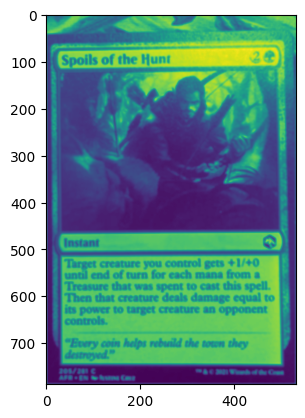

In [ ]:
# Load original image, convert to grayscale

original_image = cv2.imread('results/ROI.png')
RGB_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
#sharpened_image = unsharp_mask(RGB_img)
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
sober = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
scale = 1
resized = maintain_aspect_ratio_resize(gray, width=int(gray.shape[1] * scale))

canny = cv2.Canny(resized, 50, 80)
plt.imshow(sober)
plt.show()
plt.imshow(resized)
plt.show()
plt.imshow(canny)
plt.show()


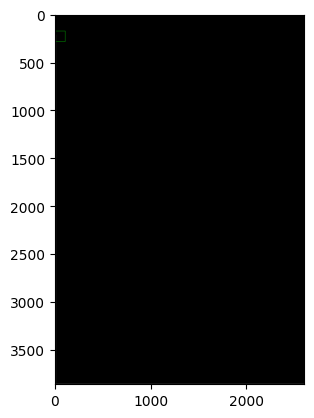

In [9]:

# Load original image, convert to grayscale
original_image = cv2.imread('results/ROI.png')
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
found = None

# Dynamically rescale image for better template matching
#for scale in np.linspace(0.1, 3.0, 20)[::-1]:
scale = 4.9
# Resize image to scale and keep track of ratio
resized = maintain_aspect_ratio_resize(gray, width=int(gray.shape[1] * scale))
r = gray.shape[1] / float(resized.shape[1])

# Stop if template image size is larger than resized image
#if resized.shape[0] < tH or resized.shape[1] < tW:
 #   break

# Detect edges in resized image and apply template matching
canny = cv2.Canny(resized, 340, 620)
detected = cv2.matchTemplate(canny, template, cv2.TM_CCOEFF)
(_, max_val, _, max_loc) = cv2.minMaxLoc(detected)

# Uncomment this section for visualization

clone = np.dstack([canny, canny, canny])
cv2.rectangle(clone, (max_loc[0], max_loc[1]), (max_loc[0] + tW, max_loc[1] + tH), (0,255,0), 2)
plt.imshow(clone)
plt.show()
cv2.imwrite("results/Aarakocra Sneak_x5_blue search.jpg", clone)
#cv2_imshow(clone,"whitemana found")
#cv2.imshow('visualize', clone)
#cv2.waitKey(0)


# Keep track of correlation value
# Higher correlation means better match
if found is None or max_val > found[0]:
    found = (max_val, max_loc, r)



In [10]:
# Compute coordinates of bounding box
(_, max_loc, r) = found
(start_x, start_y) = (int(max_loc[0] * r), int(max_loc[1] * r))
(end_x, end_y) = (int((max_loc[0] + tW) * r), int((max_loc[1] + tH) * r))

# Draw bounding box on ROI
cv2.rectangle(original_image, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
cv2.imshow('detected', original_image)
cv2.imwrite('detected.png', original_image)
cv2.waitKey(0)

-1